In [114]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

> We have only one feature X ($x_1$) and corresponding target y. </br>
> We know straight line equation is y = m.x + c </br>
> In a more sophisticated ML literature,above can be wriiten as $h_{\theta} = \theta_{0} + \theta_{1}x_{1}$ </br>
> Where $h_{\theta}$ is our hypothesis and $\theta_{0}, \theta_{1}$ are parameters.</br>
> Then our loss function can be written as, $L(\theta) = \frac{1}{2N} \sum_{n = 1}^{N} (h_{\theta} - y)^2$</br>
> Gradient Descent is used for gradient calculation to update parameters.</br>
> $\theta_{0} = \theta_{0} - \alpha \nabla L(\theta_{0})$  = $\theta_{0} - \alpha \frac{1}{N} \sum_{n = 1}^{N}(h_{\theta} - y)$</br>
> $\theta_{1} = \theta_{1} - \alpha \nabla L(\theta_{1})$  = $\theta_{1} - \alpha \frac{1}{N} \sum_{n = 1}^{N}(h_{\theta} - y) * x_1 $</br>

epoch:100--->loss:0.079,theta0:-0.067, theta1:0.872
epoch:200--->loss:0.056,theta0:-0.219, theta1:0.893
epoch:300--->loss:0.039,theta0:-0.347, theta1:0.911
epoch:400--->loss:0.027,theta0:-0.454, theta1:0.925
epoch:500--->loss:0.019,theta0:-0.543, theta1:0.937
epoch:600--->loss:0.013,theta0:-0.618, theta1:0.948
epoch:700--->loss:0.009,theta0:-0.680, theta1:0.956
epoch:800--->loss:0.007,theta0:-0.733, theta1:0.963
epoch:900--->loss:0.005,theta0:-0.776, theta1:0.969
epoch:1000--->loss:0.003,theta0:-0.813, theta1:0.974
[1.1357846 3.08458   5.033375  6.98217   8.930965 ]


Text(0, 0.5, 'Y')

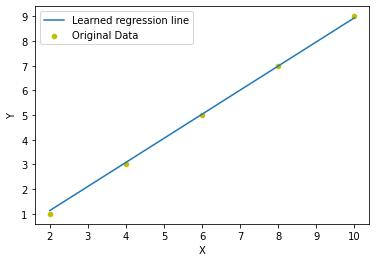

In [115]:
#Simple single feature Linear Regression
theta0 = 0.0
theta1 = 0.0
x = np.array([2,4,6,8,10],dtype =np.float32)
y = np.array([1,3,5,7,9],dtype = np.float32)
n = x.shape[0]
lr = 0.01

for epoch in range(1000):
    h_theta = theta1 * x + theta0
    loss = ((h_theta - y) ** 2).sum() / np.float32(2 * n)
    theta0 = theta0 - (lr * (h_theta - y).sum() / np.float32(n))
    theta1 = theta1 - (lr * ((h_theta - y) * x).sum() / np.float32(n))
    if (epoch + 1) % 100 == 0:  
        print('epoch:{}--->loss:{:.3f},theta0:{:.3f}, theta1:{:.3f}'.format(epoch+1,loss,theta0,theta1))
pred = (theta1 * x + theta0)
print(pred)

sns.scatterplot(x=x, y=y,color='y',label='Original Data')
sns.lineplot(x=x,y=pred,label='Learned regression line')
plt.xlabel('X')
plt.ylabel('Y')

>In order to generalize the the above equation to multiple feature set X($x_1,x_2,x_3, ... $), we make use of vector notation. </br>
>We append $x_0$(array of 1's) in the front of X, such that our hypothesis will be  $h_{\theta} = \theta_{0}.1 + \theta_{1}x_{1} + \theta_{2}x_{2} + .... $ </br>
>Above hypothesis equation will be $h_{\theta} = \theta . X^{T} $
> Then our loss function can be written as, $L(\theta) = \frac{1}{2N} \sum_{n = 1 }^{N}(\theta . X^{T} - y)^2$</br>
>Where $\theta = [\theta_{0}, \theta{1}, \theta{2}, ... ]$ and $X = [x_{0}, x{1}, x{2}, ... ]$ </br>
>Then Gradient Descent update rule will be, </br>
> $\theta = \theta - \alpha \nabla L(\theta) $ = $\theta - \alpha \sum_{n = 1 }^{N}(\theta . X^{T} - y) . X$

In [116]:
#Vector represented Linear Regression
X = np.array([2,4,6,8,10,11],dtype =np.float32)
y = np.array([1,3,5,7,9,10],dtype = np.float32)

X = X.reshape(X.shape[0],-1)
X = np.insert(X,0,np.ones(len(y),dtype = np.float32),axis=1)
theta = np.zeros((1,X.shape[1]),dtype = np.float32)
n = X.shape[0]
lr = 0.01
for epoch in range(1000):
    h_theta = theta.dot(X.T)
    loss = ((h_theta - y) ** 2).sum() / np.float32(2 * n)
    theta = theta - (lr * ((h_theta - y).dot(X) / np.float32(n)))
    if (epoch + 1) % 100 == 0: 
        print('epoch:{}--->loss:{:.3f},theta:{}'.format(epoch+1,loss,theta))

epoch:100--->loss:0.077,theta:[[-0.0737137   0.88828266]]
epoch:200--->loss:0.054,theta:[[-0.22320095  0.906312  ]]
epoch:300--->loss:0.038,theta:[[-0.34856334  0.92143166]]
epoch:400--->loss:0.027,theta:[[-0.4536945  0.9341113]]
epoch:500--->loss:0.019,theta:[[-0.5418593   0.94474465]]
epoch:600--->loss:0.013,theta:[[-0.61579585  0.953662  ]]
epoch:700--->loss:0.009,theta:[[-0.67780006  0.9611402 ]]
epoch:800--->loss:0.007,theta:[[-0.7297979  0.9674115]]
epoch:900--->loss:0.005,theta:[[-0.7734043  0.9726708]]
epoch:1000--->loss:0.003,theta:[[-0.80997336  0.9770813 ]]


> Summing over whole dataset over and over a costly operation, when data is large. </br>
> So we implement stocastic gradient descent rather than usual GD(batch gradient descent) </br>
> In true SGD, we randomly sample a data instance and pass process instead of whole dataset. </br>
> Thus update rule will be, </br>
>  $\theta = \theta - \alpha \nabla L(\theta) $ = $\theta - \alpha \sum_{n = 1 }^{N}(\theta . X_i^{T} - y) . X_i$ </br>
> Where $X_i$ is randomly sampled data instance from dataset.

### Stochastic Gradient Descent 

In [94]:
#Vector represented Linear Regression
X = np.array([2,4,6,8,10,11],dtype =np.float32)
y = np.array([1,3,5,7,9,10],dtype = np.float32)

X = X.reshape(X.shape[0],-1)
X = np.insert(X,0,np.ones(len(y),dtype = np.float32),axis=1)
theta = np.zeros((1,X.shape[1]),dtype = np.float32)
n = X.shape[0]
lr = 0.01
for epoch in range(100):
    sample_id = np.random.choice(X.shape[0],size=1,replace=False)
    sample = X[sample_id,:]
    h_theta = theta.dot(sample.T)
    loss = (np.squeeze(h_theta - y[sample_id]) ** 2) / np.float32(2 * n)
    theta = theta - (lr * (np.squeeze(h_theta - y[sample_id],axis =0).dot(sample) / np.float32(n)))
    if (epoch + 1) % 10 == 0: 
        print('epoch:{}--->loss:{:.3f},theta:{}'.format(epoch+1,loss,np.squeeze(theta)))

epoch:10--->loss:0.001,theta:[0.05960459 0.514044  ]
epoch:20--->loss:0.016,theta:[0.07934606 0.6801124 ]
epoch:30--->loss:0.022,theta:[0.09064611 0.8065328 ]
epoch:40--->loss:0.014,theta:[0.0934834 0.8571569]
epoch:50--->loss:0.007,theta:[0.08991624 0.8666774 ]
epoch:60--->loss:0.057,theta:[0.0856598 0.8669813]
epoch:70--->loss:0.022,theta:[0.07999225 0.855969  ]
epoch:80--->loss:0.001,theta:[0.07699745 0.8556251 ]
epoch:90--->loss:0.022,theta:[0.07236764 0.8565557 ]
epoch:100--->loss:0.019,theta:[0.06794791 0.8491209 ]


> SGD is cost effective compared to Batch-GD, but it requires significantlly more iterations to converge
> Thus we try to improvise, by taking random sample of set of data instances opposed to single random sample
> Thus update rule will be, </br>
>  $\theta = \theta - \alpha \nabla L(\theta) $ = $\theta - \alpha \sum_{n = 1 }^{N}(\theta . X_b^{T} - y) . X_b$ </br>
> Where $X_b$ is randomly sampled batch of data instance from dataset.

### MINI-batch Gradient Descent

In [93]:
#Vector represented Linear Regression
X = np.array([2,4,6,8,10,11],dtype =np.float32)
y = np.array([1,3,5,7,9,10],dtype = np.float32)

X = X.reshape(X.shape[0],-1)
X = np.insert(X,0,np.ones(len(y),dtype = np.float32),axis=1)
theta = np.zeros((1,X.shape[1]),dtype = np.float32)
n = X.shape[0]
lr = 0.01
size = 2
for epoch in range(100):
    sample_id = np.random.choice(X.shape[0],size=size,replace=False)
    sample = X[sample_id,:]
    h_theta = theta.dot(sample.T)
    loss = (np.squeeze(h_theta - y[sample_id]) ** 2).sum() / np.float32(2 * n)
    theta = theta - (lr * (np.squeeze(h_theta - y[sample_id],axis =0).dot(sample) / np.float32(n)))
    if (epoch + 1) % 10 == 0: 
        print('epoch:{}--->loss:{:.2f},theta:{}'.format(epoch+1,loss,np.squeeze(theta)))

epoch:10--->loss:0.12,theta:[0.09033822 0.8291107 ]
epoch:20--->loss:0.03,theta:[0.0899464 0.8568122]
epoch:30--->loss:0.05,theta:[0.07979468 0.8465969 ]
epoch:40--->loss:0.01,theta:[0.07623581 0.8725223 ]
epoch:50--->loss:0.05,theta:[0.0663881 0.8571577]
epoch:60--->loss:0.01,theta:[0.06629657 0.88205284]
epoch:70--->loss:0.05,theta:[0.0567793 0.8660782]
epoch:80--->loss:0.02,theta:[0.05045905 0.85527897]
epoch:90--->loss:0.03,theta:[0.04839105 0.87647825]
epoch:100--->loss:0.06,theta:[0.04170777 0.86918145]


>Neatly packageing all code in a class. </br>
>Running the Linear Regression model on synthetic data. </br>


In [117]:
#A function to generate a data with some gaussian noise
"""
size: Number of samples required
mean: Mean of the gaussian noise, controls the amount of data dispersion.
var: Variance of gaussian noise, controls the data dispersion.
 """
def generate_regression(size,mean,var):
    X = []
    y = []
    for i in range(0,size):
        temp = np.array(np.random.random() * 1000) 
        X.append(temp)
        y.append(3 * temp + np.random.normal(mean,var))
    y = np.array(y)
    X = np.array(X)
    return X,y

Text(0, 0.5, 'y')

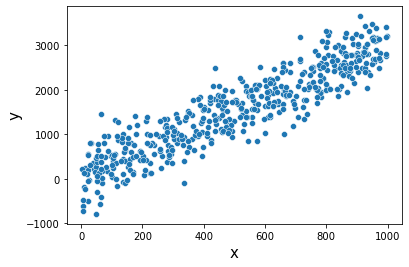

In [118]:
#Generating and plotting the data
X_train,y_train = generate_regression(500,50,400)
X_test = [x for x in range(1001)]
sns.scatterplot(x=X_train,y = y_train)
plt.xlabel('x',fontsize = 15)
plt.ylabel('y',fontsize = 15)

In [119]:
#Model Defination
"""
This class represents the Linear Regression model, and contains all the codes needed for Linear regression.
model.fit() - Performs the optimization on loss function to get optimal parameters.
model.predict() - Returns predicted targets using optimized parameter.
model.plot_model() - Plots the Training data along with learned curve.
"""
class linear_regression:
    def __init__(self,lr = 0.01,epochs = 100,criterion = 'GD',batch_size = None):
        self.loss = None
        self.lr = lr
        self.theta = None
        self.epochs = epochs
        self.criterion = criterion
        self.batch_size = batch_size
        
    def fit_GD(self,X,y):
        X = X.reshape(X.shape[0],1)
        X = np.insert(X,0,np.ones(len(y),dtype = np.float32),axis=1)
        self.theta = np.random.rand(1,X.shape[1]).astype(np.float32)
        n = X.shape[0]
        for epoch in range(self.epochs):
            h_theta = self.theta.dot(X.T)
            self.loss = ((h_theta - y) ** 2).sum() / np.float32(2 * n)
            self.theta = self.theta - (self.lr * ((h_theta - y).dot(X) / np.float32(n)))
            if (epoch + 1) % 1000 == 0: 
                print('epoch:{}--->loss:{:.3f},theta:{}'.format(epoch+1,self.loss,np.squeeze(self.theta)))
        return self.theta
    
    def fit_SGD(self,X,y):
        X = X.reshape(X.shape[0],1)
        X = np.insert(X,0,np.ones(len(y),dtype = np.float32),axis=1)
        self.theta = np.random.rand(1,X.shape[1]).astype(np.float32)
        n = X.shape[0]
        for epoch in range(100):
            sample_id = np.random.choice(X.shape[0],size=1,replace=False)
            sample = X[sample_id,:]
            h_theta = theta.dot(sample.T)
            self.loss = (np.squeeze(h_theta - y[sample_id]) ** 2) / np.float32(2 * n)
            self.theta = self.theta - (self.lr * (np.squeeze(h_theta - y[sample_id],axis =0).dot(sample) / np.float32(n)))
            if (epoch + 1) % 10 == 0: 
                print('epoch:{}--->loss:{:.3f},theta:{}'.format(epoch+1,self.loss,np.squeeze(self.theta)))
        return self.theta
    
    def fit_mini_batch_GD(self,X,y):
        X = X.reshape(X.shape[0],1)
        X = np.insert(X,0,np.ones(len(y),dtype = np.float32),axis=1)
        self.theta = np.random.rand(1,X.shape[1]).astype(np.float32)
        n = X.shape[0]
        for epoch in range(100):
            sample_id = np.random.choice(X.shape[0],size=self.batch_size,replace=False)
            sample = X[sample_id,:]
            h_theta = theta.dot(sample.T)
            self.loss = (np.squeeze(h_theta - y[sample_id]) ** 2).sum() / np.float32(2 * n)
            self.theta = self.theta - (self.lr * (np.squeeze(h_theta - y[sample_id],axis =0).dot(sample) / np.float32(n)))
            if (epoch + 1) % 10 == 0: 
                print('epoch:{}--->loss:{:.3f},theta:{}'.format(epoch+1,self.loss,np.squeeze(self.theta)))
        return self.theta
    
    def fit(self,X,y):
        if self.criterion == 'GD':
            self.fit_GD(X,y)
        elif self.criterion == 'SGD':
            self.fit_SGD(X,y)
        elif self.criterion == 'mini-batch':
            self.fit_mini_batch_GD(X,y)
            
    def predict(self,X):
        y_pred = np.array([(self.theta[0,0] + self.theta[0,1] * x) for x in X_test])
        return y_pred
    
    def plot_model(self,X_train,X_test,y_train,y_pred):
        sns.lineplot(x=X_test,y = y_pred,color = 'r',label= 'Learned Curve')
        sns.scatterplot(x=X_train,y = y_train,label = 'Train Data')
        plt.xlabel('X',fontsize = 15)
        plt.ylabel('y',fontsize = 15)
        plt.legend()
        plt.show()

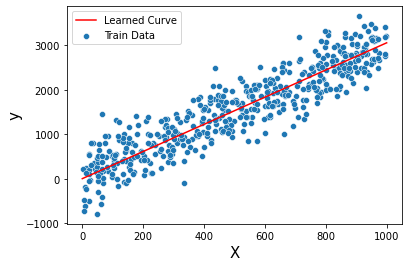

In [120]:
#Running Gradient Descent / Batch GD
#Model Building
model = linear_regression(lr= 0.000001,epochs=100)
param = model.fit(X_train,y_train)
y_pred = model.predict(X_test)
model.plot_model(X_train,X_test,y_train,y_pred)

epoch:10--->loss:3391.079,theta:[0.37515919 0.75511035]
epoch:20--->loss:757.947,theta:[0.37539724 0.88898479]
epoch:30--->loss:727.388,theta:[0.37560703 0.99698793]
epoch:40--->loss:273.334,theta:[0.37589026 1.20397659]
epoch:50--->loss:1490.768,theta:[0.3761458  1.38184179]
epoch:60--->loss:3777.435,theta:[0.37635145 1.52864055]
epoch:70--->loss:193.121,theta:[0.37658318 1.7194688 ]
epoch:80--->loss:6472.374,theta:[0.3767234  1.81377065]
epoch:90--->loss:582.634,theta:[0.37693493 1.95657176]
epoch:100--->loss:93.345,theta:[0.37709049 2.07377432]


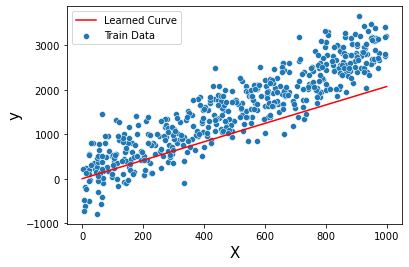

In [121]:
#Example of SGD
#Model Building
model = linear_regression(lr= 0.00001,epochs=100000,criterion='SGD')
param = model.fit(X_train,y_train)
y_pred = model.predict(X_test)
model.plot_model(X_train,X_test,y_train,y_pred)

epoch:10--->loss:43702.445,theta:[0.62461811 0.66576727]
epoch:20--->loss:38837.572,theta:[0.6251562  1.01217186]
epoch:30--->loss:45992.444,theta:[0.62568969 1.37489407]
epoch:40--->loss:51633.248,theta:[0.62622587 1.73311066]
epoch:50--->loss:52097.892,theta:[0.62679014 2.10133928]
epoch:60--->loss:37945.610,theta:[0.62734738 2.47829742]
epoch:70--->loss:35786.676,theta:[0.6278994  2.84573466]
epoch:80--->loss:36146.760,theta:[0.62844567 3.19668165]
epoch:90--->loss:37790.380,theta:[0.62897098 3.54430653]
epoch:100--->loss:42256.649,theta:[0.62955517 3.94448009]


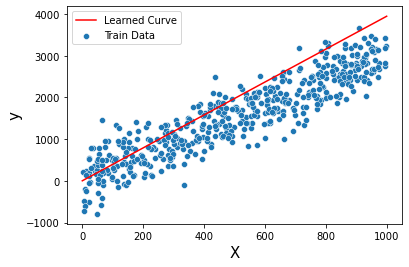

In [133]:
#Example of mini-batch GD
#Model Building
batch_size = int(X_train.shape[0] / 20)
model = linear_regression(lr= 0.000001,epochs=100000,criterion='mini-batch',batch_size= batch_size)
param = model.fit(X_train,y_train)
y_pred = model.predict(X_test)
model.plot_model(X_train,X_test,y_train,y_pred)